In [135]:
import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam





In [136]:
images_fp = './images'

In [137]:
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(images_fp,'*.jpg'))]

In [138]:
image_names

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [139]:
print(f"Total images found: {len(image_names)}")

Total images found: 7390


In [140]:
labels = [' '.join(name.split('_')[:-1:]) for name in image_names]

In [141]:
def label_encode(label):
    if label =='Abyssinian': return 0
    elif label == 'Bengal' : return 1
    elif label == 'Birman' : return 2
    elif label == 'Bombay' : return 3
    elif label == 'British Shorthair' : return 4
    elif label == 'Egyptin Mau' : return 5
    elif label == 'american bulldog' : return 6
    elif label == 'american pit bull terrier' : return 7
    elif label == 'basset hound' : return 8
    elif label == 'beagle' : return 9
    elif label == 'boxer' : return 10
    elif label == 'chihuahua' : return 11
    elif label == 'english cocker spaniel' : return 12
    elif label == 'english setter' : return 13
    elif label == 'german shorthaired' : return 14
    elif label == 'great pyrenees' : return 15
    else: return None

In [159]:
# Initialize lists to store features and labels
features = []
labels = []
IMAGE_SIZE = (224,224)

# Process each image and its label
for name in image_names:
    label = ' '.join(name.split('_')[:-1:])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(images_fp, name))
        img = tf.image.resize_with_pad(img_to_array(img, dtype = 'uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        features.append(img)
        labels.append(label_encoded)

In [160]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [161]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [162]:
features_array = np.array(features)
labels_array = np.array(labels)

In [163]:
labels_one_hot = pd.get_dummies(labels_array)

In [164]:
labels_one_hot

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [165]:
# Check the number of unique classes
unique_labels = np.unique(labels_array)
num_classes = len(unique_labels)
print(f"Number of unique classes: {num_classes}")

Number of unique classes: 15


In [166]:
#train = 60% + val = 20% and Test = 20%
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_one_hot, test_size=0.2, random_state= 42)

In [167]:
#80%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [168]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
prediction_layers = Dense(num_classes, activation = 'softmax')

In [169]:
resnet_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')
resnet_model.trainable = False

In [170]:
# build model
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = pp_i(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [171]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics = ['accuracy'])

In [172]:
#X_train = np.asarray(X_train)
#y_train = np.asarray(y_train)
#X_val = np.asarray(X_val)
#y_val = np.asarray(y_val)


In [173]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_val), X_val.shape)
print(type(y_val), y_val.shape)

<class 'numpy.ndarray'> (1800, 224, 224, 3)
<class 'pandas.core.frame.DataFrame'> (1800, 15)
<class 'numpy.ndarray'> (600, 224, 224, 3)
<class 'pandas.core.frame.DataFrame'> (600, 15)


In [174]:
# Train the model
model_history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.3123 - loss: 2.2835 - val_accuracy: 0.8550 - val_loss: 0.5149
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.7752 - loss: 0.7454 - val_accuracy: 0.9000 - val_loss: 0.3393
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.8131 - loss: 0.5927 - val_accuracy: 0.9117 - val_loss: 0.2946
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.8201 - loss: 0.5151 - val_accuracy: 0.9167 - val_loss: 0.2787
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.8540 - loss: 0.4561 - val_accuracy: 0.9317 - val_loss: 0.2304
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.8760 - loss: 0.3840 - val_accuracy: 0.9000 - val_loss: 0.2872
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.8586 - loss: 0.4242 - val_accuracy: 0.9167 - val_loss: 0.2564
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.9005 - loss: 0.3246 - val_accuracy: 0.9367 - v

In [175]:
# Plot the training and validation accuracy
acc=model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

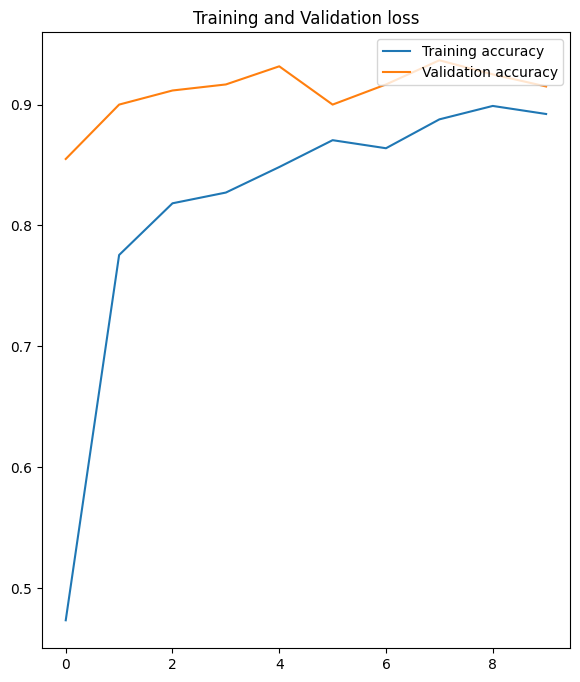

In [176]:
epochs_range = range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [179]:
plt.show()


In [180]:
model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8944 - loss: 0.3197


[0.29906222224235535, 0.8966666460037231]

In [181]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8944 - loss: 0.3197
Test accuracy: 0.8966666460037231


In [182]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step


In [183]:
y_pred

array([[3.9298579e-02, 2.4536719e-06, 4.5361207e-06, ..., 6.9264807e-08,
        2.2266075e-05, 2.7406538e-06],
       [3.8048986e-02, 9.5476419e-01, 1.9909976e-05, ..., 2.1990915e-04,
        3.1902079e-04, 3.5862362e-05],
       [6.3133193e-05, 4.3485862e-08, 2.0565199e-06, ..., 3.7659134e-09,
        7.3384638e-07, 1.1124414e-06],
       ...,
       [8.8588987e-03, 3.1147250e-05, 2.5467398e-06, ..., 9.7399650e-05,
        8.4691316e-02, 1.0683099e-06],
       [5.8936644e-07, 1.5202300e-08, 4.2724071e-08, ..., 1.9900421e-09,
        3.5434261e-06, 1.7024202e-09],
       [1.2695520e-04, 9.2886621e-06, 9.8518544e-01, ..., 8.7440667e-06,
        8.4730928e-08, 1.2140932e-02]], dtype=float32)